                            OLS Regression Results                            
Dep. Variable:              log_Sales   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     146.4
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           1.81e-16
Time:                        00:09:25   Log-Likelihood:                 22.059
No. Observations:                  52   AIC:                            -40.12
Df Residuals:                      50   BIC:                            -36.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1730      0.268     30.467      0.0

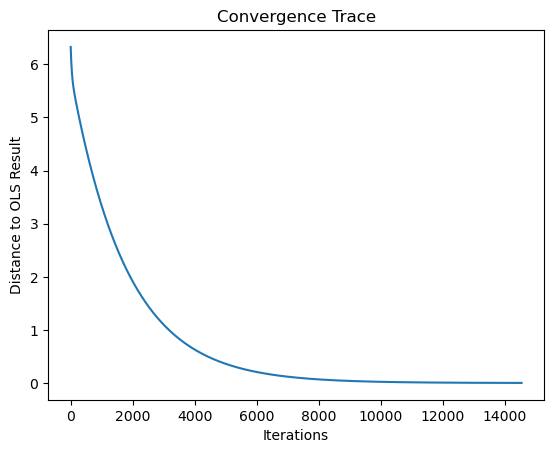


===== Part c: PyTorch Gradient Descent =====
Optimal solution (b0, b1):
[[ 8.171117  ]
 [-0.67851305]]
Number of iterations: 14166
Time to converge: 3.5504 seconds


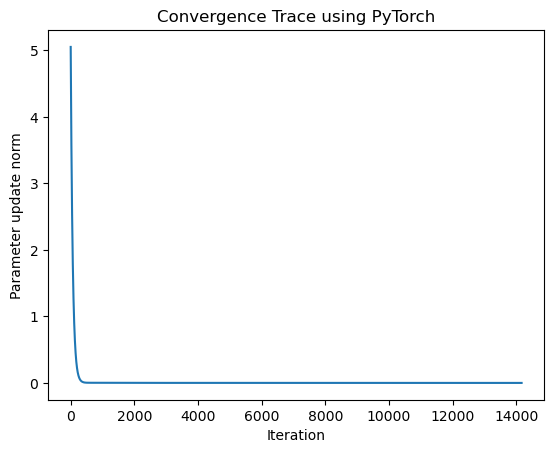

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Part a
# 1. 加载数据 
df = pd.read_csv('L1_Tesco_Data.csv') 

# 2. 准备变量
df['log_Sales'] = np.log(df['Sales'])
df['log_Price'] = np.log(df['Price'])

# 3. 构建模型
X = sm.add_constant(df['log_Price']) 
y = df['log_Sales']

# 4. 拟合 OLS 模型
model = sm.OLS(y, X).fit()

# 5. 输出回归报告
print(model.summary())

# Part b
# 1. 准备数据 (假设 df 已经加载)
y = np.log(df['Sales']).values.reshape(-1, 1)
x = np.log(df['Price']).values.reshape(-1, 1)
ones = np.ones((len(x), 1))
X = np.hstack((ones, x)) # 第一列是1，第二列是log_Price

# 2. 预计算矩阵零件 (XX 和 XY)
XX = np.matmul(X.T, X)
XY = np.matmul(X.T, y)

# 3. 设置初始参数
e0 = 1e-6          # 误差阈值
a0 = np.array([[3.0], [3.0]]) # 题目要求的起点 (b0, b1) = (3, 3)
learn_rate = 0.0008 # 学习率 (需要根据运行情况微调)

# 初始化循环变量
a_bef = a0
curr_diff = 10
t = 0
err_vec = []

print('Starting Gradient Descent...')

# 4. 梯度下降循环
while curr_diff > e0 and t <= 200000:
    t += 1
    
    # 矩阵化计算梯度
    grad_a = 2 * (np.matmul(XX, a_bef) - XY)
    
    # 更新参数
    a_aft = a_bef - learn_rate * grad_a
    
    # 计算收敛差异 (使用 L2 范数)
    curr_diff = np.linalg.norm(a_bef - a_aft, 2)
    
    a_bef = a_aft
    
    # 记录误差变化
    err_vec.append(np.linalg.norm(a_aft - a_true, 2))

# 5. 输出结果
print(f"Optimal solution: b0 = {a_aft[0][0]:.4f}, b1 = {a_aft[1][0]:.4f}")
print(f"Iterations: {t}")

# 绘制误差收敛曲线
plt.plot(err_vec)
plt.xlabel('Iterations')
plt.ylabel('Distance to OLS Result')
plt.title('Convergence Trace')
plt.show()
# ==============================
# Part c: Gradient Descent with PyTorch
# ==============================
import torch
import time

# 构造矩阵
X_np = np.hstack([np.ones((len(df),1)), df['log_Price'].values.reshape(-1,1)])
y_np = df['log_Sales'].values.reshape(-1,1)

# 转为 PyTorch tensor
X_torch = torch.tensor(X_np, dtype=torch.float32)
y_torch = torch.tensor(y_np, dtype=torch.float32)

# 初始化参数
b = torch.tensor([[3.0],[3.0]], requires_grad=True)  # 初始点 (b0,b1)
learning_rate = 0.0008  # 可以根据收敛情况调整
epsilon = 1e-6
max_iter = 100000
t = 0
curr_diff = 10
err_vec = []

start_time = time.time()

while curr_diff > epsilon and t < max_iter:
    t += 1
    
    # 前向计算 loss = ||Xb - y||^2
    y_pred = X_torch @ b
    loss = torch.sum((y_pred - y_torch)**2)
    
    # 自动计算梯度
    loss.backward()
    
    # 保存上一轮参数
    b_old = b.detach().clone()
    
    # 更新参数
    with torch.no_grad():
        b -= learning_rate * b.grad
    
    # 计算收敛差距
    curr_diff = torch.norm(b - b_old).item()
    err_vec.append(curr_diff)
    
    # 清空梯度
    b.grad.zero_()

end_time = time.time()

# 输出结果
print("\n===== Part c: PyTorch Gradient Descent =====")
print("Optimal solution (b0, b1):")
print(b.detach().numpy())
print("Number of iterations:", t)
print("Time to converge: {:.4f} seconds".format(end_time - start_time))

# 绘制收敛曲线
plt.plot(err_vec)
plt.xlabel('Iteration')
plt.ylabel('Parameter update norm')
plt.title('Convergence Trace using PyTorch')
plt.show()
